## **Import Library**

**Menambahkan Library untuk Data Manipulation dan Data Visualization**

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## **Data Understanding**

* Dataset berisi daftar harga laptop beserta spesifikasinya. Dataset dapat di download pada tautan berikut : https://www.kaggle.com/datasets/arnabchaki/laptop-price-prediction
* Memberikan informasi seperti jumlah data, missing value, duplikasi data, korelasi antar kolom, dan sebaran data.
* Melakukan data manipulation untuk mendapatkan variabel atau fitur baru
* Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.

### **Load Dataset**

In [269]:
data = pd.read_csv("laptops.csv")
data

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.4800000
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.4800000
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.0000000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.4000000
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.0000000
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.0000000
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.8000000
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.0000000


**Mengganti Nama Kolom agar Mudah untuk Manipulasi Kolom**

In [270]:
data.rename(columns = {'Operating System':'OS', ' Storage':'Storage'}, inplace = True)
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,OS,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.4800000
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.4800000
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.0000000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.4000000
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.2000000


In [271]:
data['CPU']=data['CPU'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [272]:
data['CPU']=data['CPU'].map(lambda x: x.rstrip('GHz')).astype('float32')

In [273]:
data['Storage']=data['Storage'].str.extract(r'(\d+(?:\.)?' ')')

In [274]:
data['Storage']=data['Storage'].astype('int32')

In [275]:
data['GPU']=data['GPU'].str.extract(r'(\w+)')

In [276]:
data['ScreenX']=data['Screen'].str.extract(r'(\d+(?:\.\d+)?' ')')

In [277]:
data['ScreenX']=data['ScreenX'].astype(int)

In [278]:
data['ScreenY']=data['Screen'].str.extract(r'((?:\.\d+)?x\d+)')

In [279]:
data['ScreenY']=data['ScreenY'].str.extract('[x](\d+)')

In [280]:
data['ScreenY']=data['ScreenY'].astype(int)

In [281]:
data['Weight']=data['Weight'].map(lambda x: x.rstrip('kg')).astype('float32')

In [282]:
data['RAM']=data['RAM'].map(lambda x: x.rstrip('GB')).astype('int32')

In [283]:
data['Screen Size']=data['Screen Size'].map(lambda x: x.rstrip('"')).astype('float32')

In [284]:
data.drop(columns=['Operating System Version'], inplace=True)
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,OS,Weight,Price,ScreenX,ScreenY
0,Apple,MacBook Pro,Ultrabook,13.3000002,IPS Panel Retina Display 2560x1600,2.3000000,8,128,Intel,macOS,1.3700000,11912523.4800000,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3000002,1440x900,1.8000000,8,128,Intel,macOS,1.3400000,7993374.4800000,1440,900
2,HP,250 G6,Notebook,15.6000004,Full HD 1920x1080,2.5000000,8,256,Intel,No OS,1.8600000,5112900.0000000,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.3999996,IPS Panel Retina Display 2880x1800,2.7000000,16,512,AMD,macOS,1.8300000,22563005.4000000,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3000002,IPS Panel Retina Display 2560x1600,3.0999999,8,256,Intel,macOS,1.3700000,16037611.2000000,2560,1600


In [285]:
data.dropna(inplace=True)

In [286]:
data

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,OS,Weight,Price,ScreenX,ScreenY
0,Apple,MacBook Pro,Ultrabook,13.3000002,IPS Panel Retina Display 2560x1600,2.3000000,8,128,Intel,macOS,1.3700000,11912523.4800000,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3000002,1440x900,1.8000000,8,128,Intel,macOS,1.3400000,7993374.4800000,1440,900
2,HP,250 G6,Notebook,15.6000004,Full HD 1920x1080,2.5000000,8,256,Intel,No OS,1.8600000,5112900.0000000,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.3999996,IPS Panel Retina Display 2880x1800,2.7000000,16,512,AMD,macOS,1.8300000,22563005.4000000,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3000002,IPS Panel Retina Display 2560x1600,3.0999999,8,256,Intel,macOS,1.3700000,16037611.2000000,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.2999992,Full HD 1920x1080,2.5999999,32,256,Nvidia,Windows,4.4200001,24897600.0000000,1920,1080
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0000000,Full HD 1920x1080,2.3000000,8,256,Intel,Windows,1.9500000,10492560.0000000,1920,1080
974,Asus,Rog Strix,Gaming,17.2999992,Full HD 1920x1080,2.8000000,16,256,Nvidia,Windows,2.7300000,18227710.8000000,1920,1080
975,HP,Probook 450,Notebook,15.6000004,IPS Panel Full HD 1920x1080,2.7000000,8,128,Nvidia,Windows,2.0400000,8705268.0000000,1920,1080


**Informasi Tentang Kolom**
<ol>
    <li><b>Manufacturer</b>: Nama brand Laptop</li>
    <li><b>Model Name</b>: Nama model laptop</li>
    <li><b>Category</b>: kategori laptop</li>
    <li><b>Screen size</b>: Ukuran layar dalam Inchi</li>
    <li><b>Screen</b>:Model layar yang digunakan</li>
    <li><b>CPU</b>: Prosesor laptop</li>
    <li><b>RAM</b>: Jumlah RAM laptop</li>
    <li><b>Storage</b>: Kapasitas penyimpanan laptop</li>
    <li><b>GPU</b>: kartu grafis laptop</li>
    <li><b>Operation System</b>: OS yang digunakan pada laptop</li>
    <li><b>Operation System Version</b>: Versi OS yang digunakan pada laptop</li>
    <li><b>Weight</b>: Berat laptop</li>
    <li><b>Price</b>: Harga laptop dalam mata uang india (INR)</li>
</ol>

### **Properti Data**

In [287]:
data.dtypes

Manufacturer     object
Model Name       object
Category         object
Screen Size     float32
Screen           object
CPU             float32
RAM               int32
Storage           int32
GPU              object
OS               object
Weight          float32
Price           float64
ScreenX           int32
ScreenY           int32
dtype: object

In [288]:
data.shape

(977, 14)

In [289]:
data.describe()

,Screen Size,CPU,RAM,Storage,Weight,Price,ScreenX,ScreenY
count,977.0000000,977.0000000,977.0000000,977.0000000,977.0000000,977.0000000,977.0000000,977.0000000
mean,15.0525093,2.2840328,8.5281474,220.5547595,2.0391266,10018994.5602866,1767.7830092,1079.5455476
std,1.4189552,0.5235761,4.9974867,172.1333158,0.6660085,6306430.0150241,469.4223975,285.0878032
min,10.1000004,0.9000000,2.0000000,1.0000000,0.6900000,1706374.8000000,4.0000000,768.0000000
25%,14.0000000,1.8000000,4.0000000,32.0000000,1.5000000,5326308.0000000,1440.0000000,1080.0000000
50%,15.6000004,2.5000000,8.0000000,256.0000000,2.0200000,8527428.0000000,1920.0000000,1080.0000000
75%,15.6000004,2.7000000,8.0000000,256.0000000,2.3000000,13115700.0000000,1920.0000000,1080.0000000
max,18.3999996,3.5999999,32.0000000,512.0000000,4.6999998,54232308.0000000,3200.0000000,2160.0000000


**Harga (Prize) dalam rupee (mata uang India). Perlu di konversi dalam Rupiah. 1 rupee = Rp 182.83 (6/7/2023), sehingga perlu mengalikan prize dengan 182.83**

In [290]:
data['Price'] = data['Price'] * 182.83

In [291]:
data['Price'] = data['Price'].astype('int64')

### **Cek missing value & data duplication**



In [292]:
data.isnull().sum()

Manufacturer    0
Model Name      0
Category        0
Screen Size     0
Screen          0
CPU             0
RAM             0
Storage         0
GPU             0
OS              0
Weight          0
Price           0
ScreenX         0
ScreenY         0
dtype: int64

In [293]:
data.duplicated().sum()

0

**Dataset yang dipakai sudah bersih dari nilai Null dan terbebas dari duplikasi data**

### **Exploratory Data Analysis**

**Melihat Korelasi Antar Kolom**

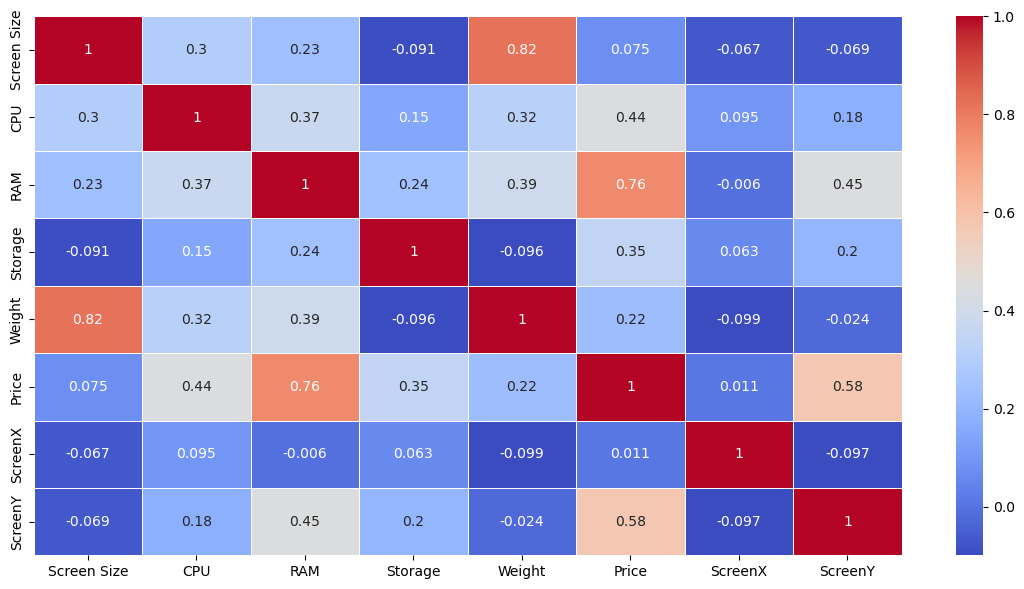

In [294]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [295]:
data.corr()['Price']

Screen Size   0.0751516
CPU           0.4376392
RAM           0.7640049
Storage       0.3468950
Weight        0.2244150
Price         1.0000000
ScreenX       0.0107446
ScreenY       0.5775938
Name: Price, dtype: float64

In [296]:
data

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,OS,Weight,Price,ScreenX,ScreenY
0,Apple,MacBook Pro,Ultrabook,13.3000002,IPS Panel Retina Display 2560x1600,2.3000000,8,128,Intel,macOS,1.3700000,2177966667,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3000002,1440x900,1.8000000,8,128,Intel,macOS,1.3400000,1461428656,1440,900
2,HP,250 G6,Notebook,15.6000004,Full HD 1920x1080,2.5000000,8,256,Intel,No OS,1.8600000,934791507,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.3999996,IPS Panel Retina Display 2880x1800,2.7000000,16,512,AMD,macOS,1.8300000,4125194277,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3000002,IPS Panel Retina Display 2560x1600,3.0999999,8,256,Intel,macOS,1.3700000,2932156455,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.2999992,Full HD 1920x1080,2.5999999,32,256,Nvidia,Windows,4.4200001,4552028208,1920,1080
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0000000,Full HD 1920x1080,2.3000000,8,256,Intel,Windows,1.9500000,1918354744,1920,1080
974,Asus,Rog Strix,Gaming,17.2999992,Full HD 1920x1080,2.8000000,16,256,Nvidia,Windows,2.7300000,3332572365,1920,1080
975,HP,Probook 450,Notebook,15.6000004,IPS Panel Full HD 1920x1080,2.7000000,8,128,Nvidia,Windows,2.0400000,1591584148,1920,1080


**Menggabungkan Kolom Resolution X dan Resolution Y untuk menghasilkan kolom baru yaitu PPI (Pixel Per Inch)**

In [297]:
data['PPI'] = (((data['ScreenX']**2) + (data['ScreenY']**2)) **0.5/data['Screen Size']).astype('float32')

In [298]:
data.drop(columns=['ScreenX', 'ScreenY', 'Screen'], inplace=True)

In [299]:
data.corr()['Price']

Screen Size   0.0751516
CPU           0.4376392
RAM           0.7640049
Storage       0.3468950
Weight        0.2244150
Price         1.0000000
PPI           0.3415566
Name: Price, dtype: float64

**Menghapus Kolom yang tidak berkorelasi dengan Price**

In [300]:
data.drop(columns=['Model Name', 'Category', 'Screen Size'], inplace=True)
data.head()

,Manufacturer,CPU,RAM,Storage,GPU,OS,Weight,Price,PPI
0,Apple,2.3000000,8,128,Intel,macOS,1.3700000,2177966667,226.9830017
1,Apple,1.8000000,8,128,Intel,macOS,1.3400000,1461428656,127.6779404
2,HP,2.5000000,8,256,Intel,No OS,1.8600000,934791507,141.2119904
3,Apple,2.7000000,16,512,AMD,macOS,1.8300000,4125194277,220.5346222
4,Apple,3.0999999,8,256,Intel,macOS,1.3700000,2932156455,226.9830017


In [301]:
data.corr()['Price']

CPU       0.4376392
RAM       0.7640049
Storage   0.3468950
Weight    0.2244150
Price     1.0000000
PPI       0.3415566
Name: Price, dtype: float64

**Cek Data Kategorik yang terdapat pada kolom GPU**

In [302]:
data.GPU.unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

**Cek Data Kategorik yang terdapat pada kolom Manufacturer**

In [303]:
data.Manufacturer.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

**Dikarenakan data kategorik pada brand terlalu banyak, maka dilakukan penyederhanaan tipe Brand**

In [304]:
#Simple Brand Category
def setbrandcategory(text):
    if text == 'Apple':
        return 'Apple'
    elif text == 'Acer':
        return 'Acer'
    elif text == 'Asus':
        return 'Asus'
    elif text == 'Dell':
        return 'Dell'
    elif text == 'Lenovo':
        return 'Lenovo'
    elif text == 'HP':
        return 'HP'
    else:
        return 'Other'
    
data['Manufacturer'] = data['Manufacturer'].apply(lambda x:setbrandcategory(x))
data

,Manufacturer,CPU,RAM,Storage,GPU,OS,Weight,Price,PPI
0,Apple,2.3000000,8,128,Intel,macOS,1.3700000,2177966667,226.9830017
1,Apple,1.8000000,8,128,Intel,macOS,1.3400000,1461428656,127.6779404
2,HP,2.5000000,8,256,Intel,No OS,1.8600000,934791507,141.2119904
3,Apple,2.7000000,16,512,AMD,macOS,1.8300000,4125194277,220.5346222
4,Apple,3.0999999,8,256,Intel,macOS,1.3700000,2932156455,226.9830017
...,...,...,...,...,...,...,...,...,...
972,Dell,2.5999999,32,256,Nvidia,Windows,4.4200001,4552028208,127.3356781
973,Other,2.3000000,8,256,Intel,Windows,1.9500000,1918354744,157.3505096
974,Asus,2.8000000,16,256,Nvidia,Windows,2.7300000,3332572365,127.3356781
975,HP,2.7000000,8,128,Nvidia,Windows,2.0400000,1591584148,141.2119904


In [305]:
data.dtypes

Manufacturer     object
CPU             float32
RAM               int32
Storage           int32
GPU              object
OS               object
Weight          float32
Price             int64
PPI             float32
dtype: object

**Cek Data Kategorik yang terdapat pada kolom OS**

In [306]:
data.OS.unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

**Dikarenakan data kategorik pada brand terlalu banyak, maka dilakukan penyederhanaan tipe OS**

In [307]:
#Simple OS Category
def setoscategory(text):
    if text == 'Mac OS':
        return 'MacOS'
    elif text == 'macOS':
        return 'MacOS'
    elif text == 'Windows':
        return 'Windows'
    elif text == 'Linux':
        return 'Linux'
    else:
        return 'Other'
    
data['OS'] = data['OS'].apply(lambda x:setoscategory(x))
data

,Manufacturer,CPU,RAM,Storage,GPU,OS,Weight,Price,PPI
0,Apple,2.3000000,8,128,Intel,MacOS,1.3700000,2177966667,226.9830017
1,Apple,1.8000000,8,128,Intel,MacOS,1.3400000,1461428656,127.6779404
2,HP,2.5000000,8,256,Intel,Other,1.8600000,934791507,141.2119904
3,Apple,2.7000000,16,512,AMD,MacOS,1.8300000,4125194277,220.5346222
4,Apple,3.0999999,8,256,Intel,MacOS,1.3700000,2932156455,226.9830017
...,...,...,...,...,...,...,...,...,...
972,Dell,2.5999999,32,256,Nvidia,Windows,4.4200001,4552028208,127.3356781
973,Other,2.3000000,8,256,Intel,Windows,1.9500000,1918354744,157.3505096
974,Asus,2.8000000,16,256,Nvidia,Windows,2.7300000,3332572365,127.3356781
975,HP,2.7000000,8,128,Nvidia,Windows,2.0400000,1591584148,141.2119904


In [308]:
data.dtypes

Manufacturer     object
CPU             float32
RAM               int32
Storage           int32
GPU              object
OS               object
Weight          float32
Price             int64
PPI             float32
dtype: object

**Menyederhanakan Tipe Data dari Kolom Numerik**

In [309]:

data['Price'] = data['Price'].astype('float32')
data['PPI'] = data['PPI'].astype('int32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  977 non-null    object 
 1   CPU           977 non-null    float32
 2   RAM           977 non-null    int32  
 3   Storage       977 non-null    int32  
 4   GPU           977 non-null    object 
 5   OS            977 non-null    object 
 6   Weight        977 non-null    float32
 7   Price         977 non-null    float32
 8   PPI           977 non-null    int32  
dtypes: float32(3), int32(3), object(3)
memory usage: 45.9+ KB


In [310]:
data.head()

,Manufacturer,CPU,RAM,Storage,GPU,OS,Weight,Price,PPI
0,Apple,2.3000000,8,128,Intel,MacOS,1.3700000,2177966592.0000000,226
1,Apple,1.8000000,8,128,Intel,MacOS,1.3400000,1461428608.0000000,127
2,HP,2.5000000,8,256,Intel,Other,1.8600000,934791488.0000000,141
3,Apple,2.7000000,16,512,AMD,MacOS,1.8300000,4125194240.0000000,220
4,Apple,3.0999999,8,256,Intel,MacOS,1.3700000,2932156416.0000000,226


**Melihat Sebaran Data dari Masing-Masing Kolom**

In [311]:
def pie_bool(data):
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
     
    os_label = ['Mac OS', 'Other', 'Windows', 'Linux']
    values = data['OS'].value_counts().values
    fig.add_trace(go.Pie(labels=os_label, values=values, name="OS", title="OS"),1, 1)

    
    GPU_label = ['Intel', 'AMD', 'Nvidia']
    values = data['GPU'].value_counts().values
    fig.add_trace(go.Pie(labels=GPU_label, values=values, name="GPU", title="GPU"),1, 2)
    
    fig.update_traces(hole=.55, hoverinfo="label+percent+name")

    fig.update_layout(title_text="Persebaran Data pada Kolom OS dan GPU", title_xanchor="auto")
    fig.show()

In [312]:
pie_bool(data)

In [313]:
def pie_bool(data):
    
    fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
     
    brand_label = ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Other']

    values = data['Manufacturer'].value_counts().values
    fig.add_trace(go.Pie(labels=brand_label, values=values, name="Manufacturer", title="Manufacturer"),1, 1)
    
    fig.update_traces(hole=.55, hoverinfo="label+percent+name")

    fig.update_layout(title_text="Persebaran Data pada Kolom Manufacturer", title_xanchor="auto")
    fig.show()

In [314]:
pie_bool(data)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

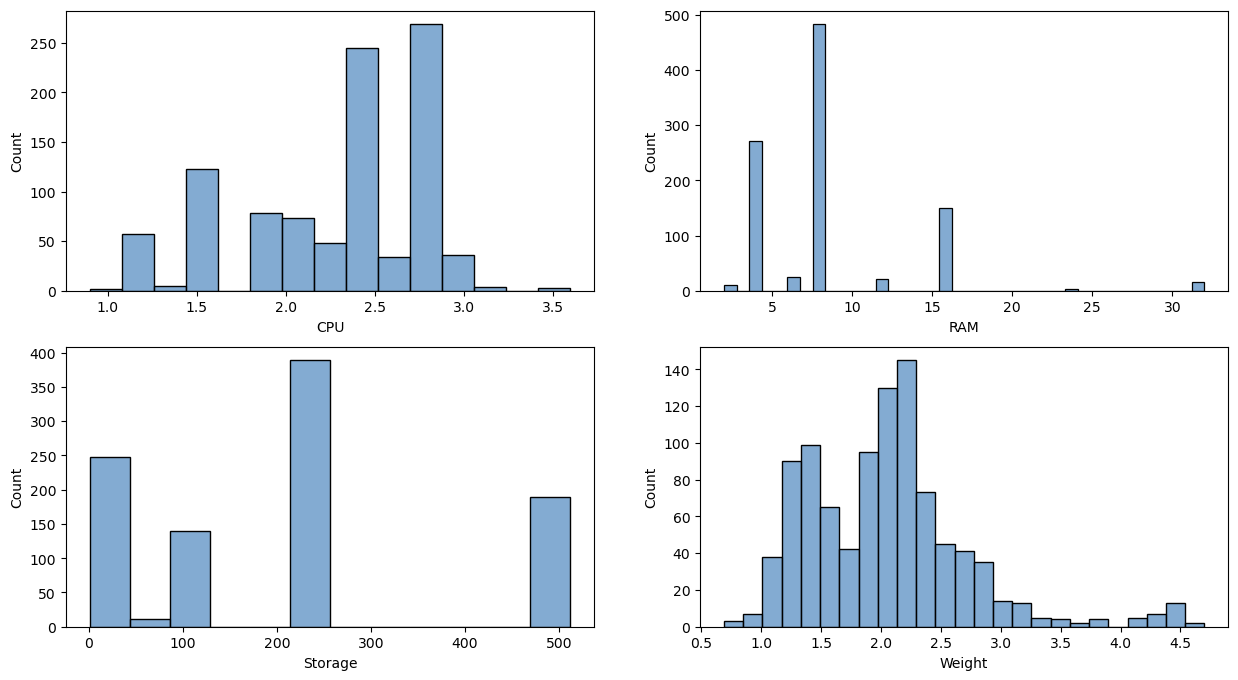

In [315]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
sns.histplot(data=data, x='CPU', ax=axes[0,0], color='#598fc4')
sns.histplot(data=data, x='RAM', ax=axes[0,1], color='#598fc4')
sns.histplot(data=data, x='Storage', ax=axes[1,0], color='#598fc4')
sns.histplot(data=data, x='Weight', ax=axes[1,1], color='#598fc4')

<AxesSubplot:xlabel='PPI', ylabel='Count'>

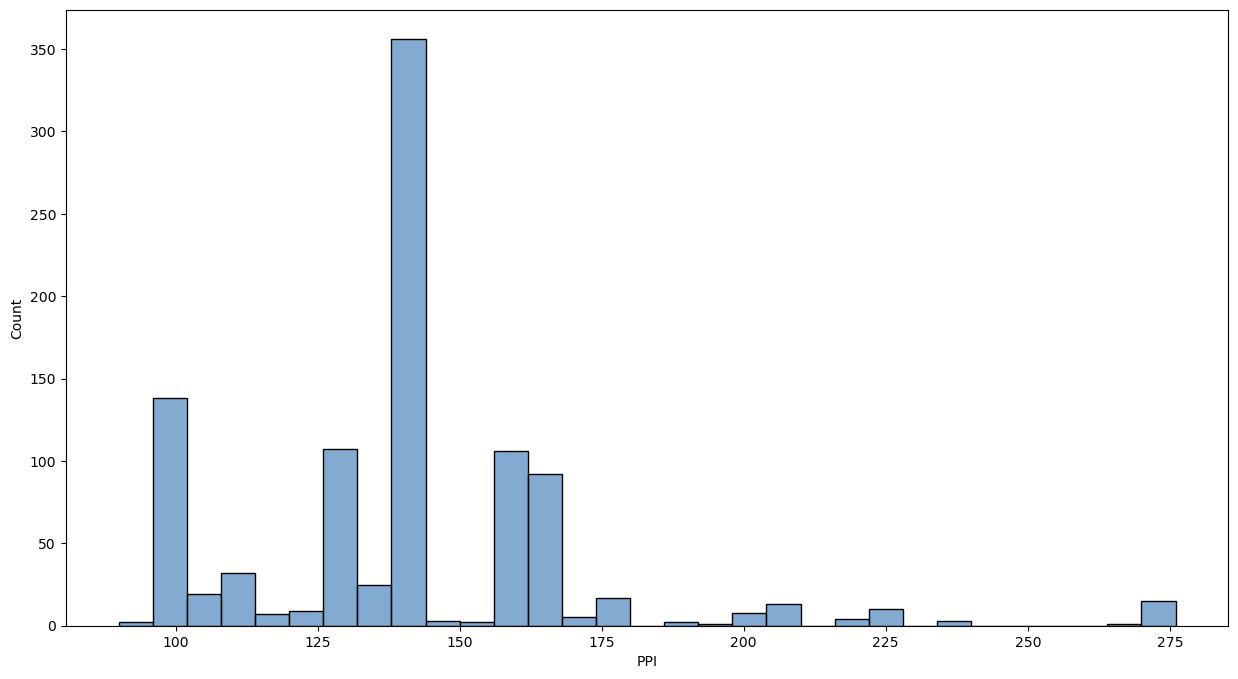

In [316]:
fig, axes = plt.subplots(1,1, figsize=(15,8))
sns.histplot(data=data, x='PPI', color='#598fc4')


## **Data Preparation**
* Melakukan seleksi fitur yaitu membagi data fitur dan data label
* Membagi dataset menjadi data training dan data testing

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sklearn.metrics as metrics

**Membagi dataset menjadi data latih dan data uji dengan prosentasi 85 : 15**

In [318]:
#Split Train and Test Set
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Manufacturer,CPU,RAM,Storage,GPU,OS,Weight,PPI
0,Apple,2.3000000,8,128,Intel,MacOS,1.3700000,226
1,Apple,1.8000000,8,128,Intel,MacOS,1.3400000,127
2,HP,2.5000000,8,256,Intel,Other,1.8600000,141
3,Apple,2.7000000,16,512,AMD,MacOS,1.8300000,220
4,Apple,3.0999999,8,256,Intel,MacOS,1.3700000,226


## **Membangun Model**

* Memprediksi algoritma dengan performa terbaik menggunakan LazyPredict
* Membuat pipeline untuk memudahkan proses preprocessing model
* Menggunakan ColumnTransformer untuk menggabungkan pipeline data numerik dan data kategorik
* Memilih algoritma dengan performa terbaik untuk di evaluasi
* Menambahkan parameter tunning pada algoritma yang dipilih

In [319]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  7.36it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.8591456,0.8668637,0.2235895,0.0600233
SVR,0.8559051,0.8638007,0.2261468,0.0361459
NuSVR,0.8543641,0.8623442,0.2273528,0.0483356
RandomForestRegressor,0.8497845,0.8580155,0.2308998,0.2080660
GradientBoostingRegressor,0.8486530,0.8569460,0.2317678,0.0760880
HistGradientBoostingRegressor,0.8404742,0.8492154,0.2379477,0.4525354
LGBMRegressor,0.8372877,0.8462034,0.2403125,0.0845511
BaggingRegressor,0.8296032,0.8389400,0.2459218,0.0324066
ExtraTreesRegressor,0.8290976,0.8384621,0.2462863,0.1963756


**Menambahkan library dari algoritma terbaik**

In [320]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### **Memilih Hyperparameter**

**Menghapus kolom Manufacturer, GPU, dan OS terlebih dahulu karena merupakan data kategorikal**

In [321]:
X = data.drop(columns=['Manufacturer', 'GPU', 'OS', 'Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,CPU,RAM,Storage,Weight,PPI
0,2.3000000,8,128,1.3700000,226
1,1.8000000,8,128,1.3400000,127
2,2.5000000,8,256,1.8600000,141
3,2.7000000,16,512,1.8300000,220
4,3.0999999,8,256,1.3700000,226


**Mencari Hyperparameter Algoritma XGBRegressor**

In [322]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [1, 3, 5],
    'random_state': [42],
    'n_jobs': [-1]
}

gb_search = GridSearchCV(XGBRegressor(), parameters, cv=3)

gb_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],

In [323]:
print(gb_search.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1.0}


**Mengembalikan kolom Manufacturer, GPU, dan OS sebagai data fitur untuk pelatihan**

In [324]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Manufacturer,CPU,RAM,Storage,GPU,OS,Weight,PPI
0,Apple,2.3000000,8,128,Intel,MacOS,1.3700000,226
1,Apple,1.8000000,8,128,Intel,MacOS,1.3400000,127
2,HP,2.5000000,8,256,Intel,Other,1.8600000,141
3,Apple,2.7000000,16,512,AMD,MacOS,1.8300000,220
4,Apple,3.0999999,8,256,Intel,MacOS,1.3700000,226


In [325]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  977 non-null    object 
 1   CPU           977 non-null    float32
 2   RAM           977 non-null    int32  
 3   Storage       977 non-null    int32  
 4   GPU           977 non-null    object 
 5   OS            977 non-null    object 
 6   Weight        977 non-null    float32
 7   PPI           977 non-null    int32  
dtypes: float32(2), int32(3), object(3)
memory usage: 42.1+ KB


**Melihat index tiap kolom**

In [326]:
mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Manufacturer',
 1: 'CPU',
 2: 'RAM',
 3: 'Storage',
 4: 'GPU',
 5: 'OS',
 6: 'Weight',
 7: 'PPI'}

**Menambahkan ColumnTransformer untuk menggabungkan data numerik dan kategorik**

In [442]:


feature = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,4,5,7,-7,-6])
])


**Menggunakan Pipeline dan Hyperparameter**

In [443]:
XGB = XGBRegressor(colsample_bytree = 1.0, gamma = 0, learning_rate = 0.1, max_depth = 5, min_child_weight = 5, n_estimators = 200, n_jobs = -1, random_state = 42, reg_alpha = 0, reg_lambda = 1, scale_pos_weight = 1, subsample = 0.8)

XGB_pipe = Pipeline([
    ('feature', feature),
    ('XGB', XGB)
])

XGB_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature',
                 ColumnTransformer(transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 4, 5, 7, -7, -6])])),
                ('XGB',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, g..., gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_de

## **Evaluation**
*	Metrik evaluasi yang digunakan adalah *Mean Square Error* (MSE), *Root Mean Square Error* (RMSE), dan *R2 Score*
* MSE melakukan pengurangan nilai data aktual dengan data peramalan dan hasilnya dikuadratkan (squared) kemudian dijumlahkan secara keseluruhan dan membaginya dengan banyaknya data yang ada
* RMSE adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. Cara menghitungnya tinggal mengakar kan mse menggunakan fungsi *np.sqrt*
* R2 Score dijadikan sebagai pengukuran seberapa baik garis regresi mendekati nilai data asli yang dibuat melalui model.
* Menampilkan hasil pengujian MSE, RMSE, dan R2 Score dari algoritma diatas.

### **Evaluasi Model dengan Performa Terbaik**

In [444]:
final_report = {'Model_Name': [], 'mse': [], 'r2': []}

# Evaluasi model XGBRegressor
pred = XGB_pipe.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('XGBRegressor')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

In [445]:
final_report

{'Model_Name': ['XGBRegressor'],
 'mse': [0.061388683],
 'r2': [0.8365133867365673]}

**Menyederhanakan format data numerik**

In [446]:
pd.options.display.float_format = '{:.7f}'.format

In [447]:
final_report = pd.DataFrame.from_dict(final_report)
final_report

,Model_Name,mse,r2
0,XGBRegressor,0.0613887,0.8365134


**Menambah Metrik RMSE untuk Pengujian**

In [448]:
final_report['rmse'] = np.sqrt(final_report['mse'])
final_report

,Model_Name,mse,r2,rmse
0,XGBRegressor,0.0613887,0.8365134,0.2477674


### **Membandingkan data sebenarnya dengan hasil prediksi**

In [449]:
model_dict = {'XGB': XGB_pipe}
prediksi = X_test.iloc[:130].copy()
pred_dict = {'y_true':y_test[:130]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_XGB
966,21.0168476,20.8999996
879,21.0336742,20.7000008
436,20.1507893,20.2999992
970,21.8505459,22.0000000
261,20.3972893,20.2999992
...,...,...
54,20.2521057,20.5000000
34,21.2072182,21.3999996
434,22.1048985,22.0000000
30,19.8026810,19.7999992
